In [1]:
import pandas as pd
import numpy as np
#import sys
from numpy import NaN
from scipy import stats
import statistics
import matplotlib.pyplot as plt
#from matplotlib_venn import venn2
from sklearn.svm import SVC
#from sklearn.cluster import KMeans
#from scipy import signal
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
#from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import plot_confusion_matrix

#%matplotlib inline  
#%matplotlib notebook
#%pylab

In [2]:
# uncomment this if you want to see all the dataframe
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

In [3]:
A549_TGF_scRNAseq = pd.read_csv('A549_TGFB1.normalized.txt',sep='\t',index_col=0)
A549_EGF_scRNAseq = pd.read_csv('A549_EGF.normalized.txt',sep='\t',index_col=0)
A549_TNF_scRNAseq = pd.read_csv('A549_TNF.normalized.txt',sep='\t',index_col=0)

A549_TGF_scRNAseq

,AAACCCACACCAAAGG,AAACCCACAGAGATTA,AAAGGATAGTCCTGTA,AAAGGTAAGGCGACAT,AACACACTCTGCGTCT,AACAGGGCAACACGAG,AACCATGGTTATCTTC,AACCCAAAGGTAGACC,AACCCAATCCATCACC,AACCTGACAGACCTGC,...,TCAAGTGGTCAACATC,TCAGGTAAGGGATCAC,TCATGCCCACATGTTG,TCGCTTGGTGATAGAT,TGCAGTAGTGTACAGG,TGTACAGTCATGCCAA,TTGGGTAAGTTGCTCA,TTTGGAGCAACATACC,AATGCCAAGTGTGTTC,CCGGGTATCGTGGGTC
AL669831.5,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
FAM41C,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
AL645608.3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
AL645608.1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.767296
SAMD11,0.545078,0.0,0.0,0.891356,0.645806,1.154717,0.0,0.609833,0.59346,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BX004987.1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
AC011043.1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
AL592183.1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
AL354822.1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [4]:
A549_TGF_metadata = pd.read_csv('A549_TGFB1_metadata.txt',sep='\t',index_col=0)
A549_EGF_metadata = pd.read_csv('A549_EGF_metadata.txt',sep='\t',index_col=0)
A549_TNF_metadata = pd.read_csv('A549_TNF_metadata.txt',sep='\t',index_col=0)

A549_TGF_metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,Barcode,Drug,Target,CellLine,Treatment,Doublet,Condition,DrugBroad,ConditionBroad,S.Score,G2M.Score,Phase,RNA_snn_res.0.1,seurat_clusters,RNA_snn_res.0.25
AAACCCACACCAAAGG,Plate1,13798,3657,0.115524,Bar41,LY364947,TGFB1,A549,TGFB1,Singlet,TGFB1_LY364947,Inhibited,TGFB1_Inhibited,-0.081115,0.198469,G2M,0,0,0
AAACCCACAGAGATTA,Plate1,9673,2946,0.117544,Bar41,LY364947,TGFB1,A549,TGFB1,Singlet,TGFB1_LY364947,Inhibited,TGFB1_Inhibited,-0.112881,-0.171010,G1,0,0,0
AAAGGATAGTCCTGTA,Plate1,7946,2476,0.187138,Bar41,LY364947,TGFB1,A549,TGFB1,Singlet,TGFB1_LY364947,Inhibited,TGFB1_Inhibited,-0.229076,-0.421427,G1,0,0,0
AAAGGTAAGGCGACAT,Plate1,6952,2048,0.199799,Bar41,LY364947,TGFB1,A549,TGFB1,Singlet,TGFB1_LY364947,Inhibited,TGFB1_Inhibited,-0.093443,-0.291145,G1,0,0,0
AACACACTCTGCGTCT,Plate1,11019,3203,0.149741,Bar41,LY364947,TGFB1,A549,TGFB1,Singlet,TGFB1_LY364947,Inhibited,TGFB1_Inhibited,-0.002370,-0.137601,G1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTACAGTCATGCCAA,Plate1,2298,1109,0.134465,Bar45,AG-370,PDGFR,A549,TGFB1,Singlet,TGFB1_AG-370,Inhibited,TGFB1_Inhibited,-0.086841,-0.261770,G1,4,2,2
TTGGGTAAGTTGCTCA,Plate1,4439,1652,0.097770,Bar30,Torin 1,mTOR,A549,TGFB1,Singlet,TGFB1_Torin 1,Inhibited,TGFB1_Inhibited,-0.019462,0.018343,G2M,4,1,1
TTTGGAGCAACATACC,Plate1,5537,1759,0.136175,Bar30,Torin 1,mTOR,A549,TGFB1,Singlet,TGFB1_Torin 1,Inhibited,TGFB1_Inhibited,-0.184050,-0.390063,G1,4,1,1
AATGCCAAGTGTGTTC,Plate1,1493,890,0.010047,Bar25,PKC 412,PKC,A549,TGFB1,Singlet,TGFB1_PKC 412,Inhibited,TGFB1_Inhibited,-0.201417,-0.322569,G1,5,0,0


In [5]:
A549_TGF_init_ctrls = A549_TGF_scRNAseq[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].mean(axis=1)
A549_EGF_init_ctrls = A549_EGF_scRNAseq[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].mean(axis=1)
A549_TNF_init_ctrls = A549_TNF_scRNAseq[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_Untreated'].index].mean(axis=1)

In [6]:
# normalizing the datasets
A549_TGF_scRNAseq_norm_ = A549_TGF_scRNAseq.subtract(A549_TGF_init_ctrls,axis=0)
A549_EGF_scRNAseq_norm_ = A549_EGF_scRNAseq.subtract(A549_EGF_init_ctrls,axis=0)
A549_TNF_scRNAseq_norm_ = A549_TNF_scRNAseq.subtract(A549_TNF_init_ctrls,axis=0)

In [7]:
# taking intersection of genes
genes_list = list(set(A549_TGF_scRNAseq_norm_.index) & set(A549_EGF_scRNAseq_norm_.index) & set(A549_TNF_scRNAseq_norm_.index))
print(len(genes_list))

A549_TGF_scRNAseq_norm = A549_TGF_scRNAseq_norm_.loc[genes_list].copy()
A549_EGF_scRNAseq_norm = A549_EGF_scRNAseq_norm_.loc[genes_list].copy()
A549_TNF_scRNAseq_norm = A549_TNF_scRNAseq_norm_.loc[genes_list].copy()

12926


In [8]:
# read drugs legend
dr_legend = pd.read_excel('drugs_legend.xlsx',index_col=0)
dr_legend

,Target
Drug,
PKC 412,PKC
Doramapimod,p38
Erlotinib,EGFR
NVP-BEZ235,PI3K
Phthalazinone Pyrazole,Aurora-A
Torin 1,mTOR
BIBF 1120,VGFR/PDGFR/FGFR
CAY10657,IKK2
Ruxolitinib,JAK


In [9]:
# calculating STV
trainset_epi = A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index]
trainset_mes = A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index]
gene_trainset = pd.concat([trainset_epi,trainset_mes],axis=1)

cls = list(np.full(len(trainset_epi.columns),0)) + list(np.full(len(trainset_mes.columns),1))

svc = SVC(kernel='linear')
svc.fit(gene_trainset.transpose(),cls)
b_coeff = -svc.intercept_[0]/linalg.norm(svc.coef_[0])
norm_vec = svc.coef_[0]/linalg.norm(svc.coef_[0])

epi_cnt = trainset_epi.mean(axis=1)
mes_cnt = trainset_mes.mean(axis=1)
s_vec = (mes_cnt - epi_cnt)/linalg.norm(mes_cnt - epi_cnt)

norm_vec_df = pd.DataFrame(s_vec,index=gene_trainset.index,columns=['s_vec'])
norm_vec_df.insert(0,'norm_vec',norm_vec)
# plot STV ranking
#norm_vec_df.to_csv('Phospho_MS_STV.csv')
#norm_vec_df.sort_values(by='norm_vec')

angle = (np.arccos(np.dot(norm_vec,s_vec))/np.pi)*180
angle

42.02111069762612

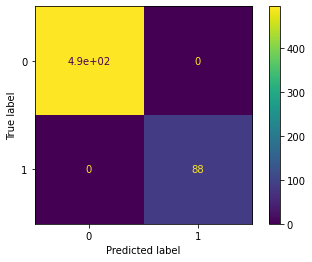

In [10]:
plot_confusion_matrix(svc,gene_trainset.transpose(),cls)
# clear separation

In [45]:
norm_vec_df.to_csv('EMT_STV_scRNAseq.csv')
norm_vec_df.sort_values(by='norm_vec')

,norm_vec,s_vec
CAV1,-0.117024,-0.059064
S100A4,-0.084485,-0.080310
ASPH,-0.070249,-0.070472
AREG,-0.064849,-0.063514
MYOF,-0.062377,-0.060868
...,...,...
PMEPA1,0.078990,0.141725
FOXP1,0.089805,0.087234
NPTX1,0.098070,0.115834
CCDC80,0.098656,0.120192


In [44]:
norm_vec_df.loc['CD63']

norm_vec   -0.009341
s_vec       0.000545
Name: CD63, dtype: float64

In [46]:
# entring parameters for plots
drug_plot='PD 0325901'
gene_name='VIM'

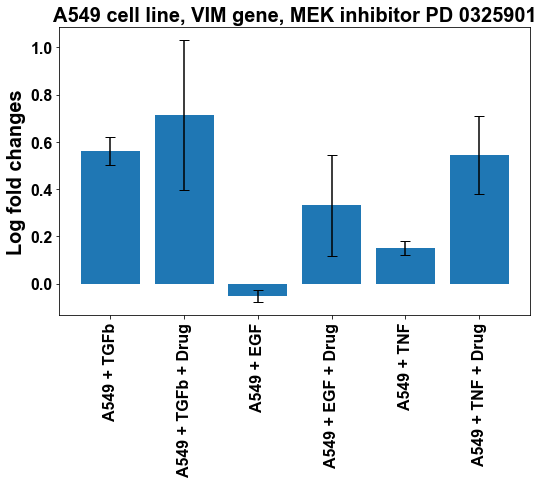

In [47]:
# make bar plot for all cells
names = ['A549 + TGFb','A549 + TGFb + Drug','A549 + EGF','A549 + EGF + Drug','A549 + TNF','A549 + TNF + Drug']

if drug_plot in list(set(A549_TGF_metadata['Drug'])):
    A549_TGF_gene_ctrl = statistics.mean(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    A549_TGF_gene_ctrl_err = stats.sem(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    A549_TGF_gene_drug = statistics.mean(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
    A549_TGF_gene_drug_err = stats.sem(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    A549_TGF_gene_ctrl = statistics.mean(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    A549_TGF_gene_ctrl_err = stats.sem(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    A549_TGF_gene_drug = 0
    A549_TGF_gene_drug_err = 0

if drug_plot in list(set(A549_EGF_metadata['Drug'])):
    A549_EGF_gene_ctrl = statistics.mean(A549_EGF_scRNAseq_norm[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    A549_EGF_gene_ctrl_err = stats.sem(A549_EGF_scRNAseq_norm[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    A549_EGF_gene_drug = statistics.mean(A549_EGF_scRNAseq_norm[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
    A549_EGF_gene_drug_err = stats.sem(A549_EGF_scRNAseq_norm[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    A549_EGF_gene_ctrl = statistics.mean(A549_EGF_scRNAseq_norm[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    A549_EGF_gene_ctrl_err = stats.sem(A549_EGF_scRNAseq_norm[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    A549_EGF_gene_drug = 0
    A549_EGF_gene_drug_err = 0

if drug_plot in list(set(A549_TNF_metadata['Drug'])):
    A549_TNF_gene_ctrl = statistics.mean(A549_TNF_scRNAseq_norm[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    A549_TNF_gene_ctrl_err = stats.sem(A549_TNF_scRNAseq_norm[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    A549_TNF_gene_drug = statistics.mean(A549_TNF_scRNAseq_norm[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == drug_plot].index].loc[gene_name])
    A549_TNF_gene_drug_err = stats.sem(A549_TNF_scRNAseq_norm[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    A549_TNF_gene_ctrl = statistics.mean(A549_TNF_scRNAseq_norm[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    A549_TNF_gene_ctrl_err = stats.sem(A549_TNF_scRNAseq_norm[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    A549_TNF_gene_drug = 0
    A549_TNF_gene_drug_err = 0

values = [A549_TGF_gene_ctrl,A549_TGF_gene_drug,A549_EGF_gene_ctrl,A549_EGF_gene_drug,A549_TNF_gene_ctrl,A549_TNF_gene_drug]
errs = [A549_TGF_gene_ctrl_err,A549_TGF_gene_drug_err,A549_EGF_gene_ctrl_err,A549_EGF_gene_drug_err,A549_TNF_gene_ctrl_err,A549_TNF_gene_drug_err]

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.title('A549 cell line, ' + gene_name + ' gene, ' + dr_legend.loc[drug_plot,'Target'] + ' inhibitor ' + drug_plot,**fontTitle)
plt.ylabel('Log fold changes',**fontLabel)
plt.bar(names,values,yerr=errs,capsize=5)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

In [48]:
# plotting DPD distribution
drug_plot='Necrostatin-5'

DPD for epithelial state = -5.793472563257421 ± 0.02830529189302452
DPD for TGFb control = 5.343098471561533 ± 0.030314718331746773
DPD for RIPK1 inhibitor = -1.9857943952370865 ± 0.15995902635420023


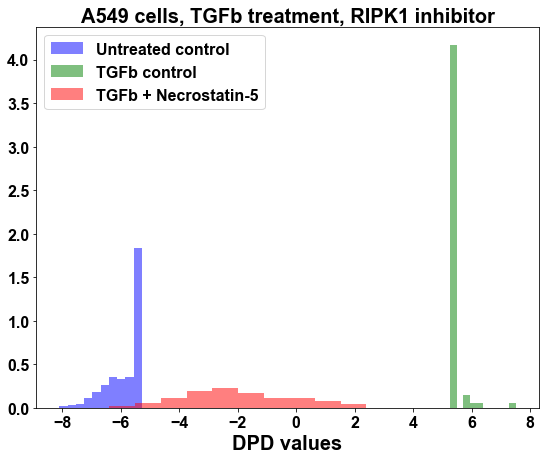

In [49]:
DPDs_epi = []
for code in A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TGFb control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TGFb control',alpha=0.5)
plt.hist(DPDs_drg, bins=10,density=True,color='red',label='TGFb + ' + drug_plot,alpha=0.5) 

plt.title('A549 cells, TGFb treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

DPD for epithelial state = -5.793472563257421 ± 0.028305292154574776
DPD for EGF control = -5.248123385468533 ± 0.05129193256545551
DPD for RIPK1 inhibitor = -5.461400896793414 ± 0.10488445258759518


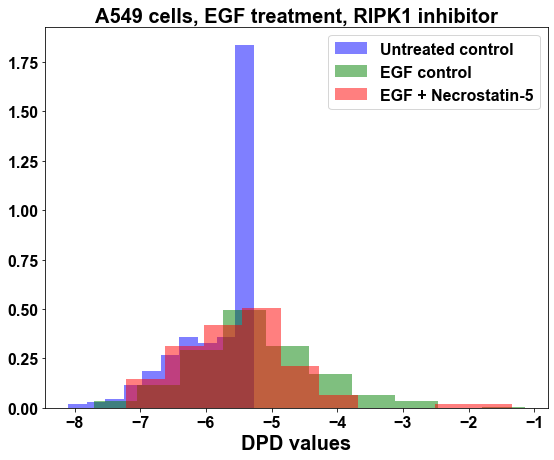

In [50]:
DPDs_epi = []
for code in A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for EGF control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='EGF control',alpha=0.5)
plt.hist(DPDs_drg, bins=10,density=True,color='red',label='EGF + ' + drug_plot,alpha=0.5) 

plt.title('A549 cells, EGF treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

DPD for epithelial state = -5.793472563257421 ± 0.028305291947393008
DPD for TNF control = -4.590512715247331 ± 0.06715478713563336
DPD for RIPK1 inhibitor = -5.941293493623613 ± 0.06703120513035594


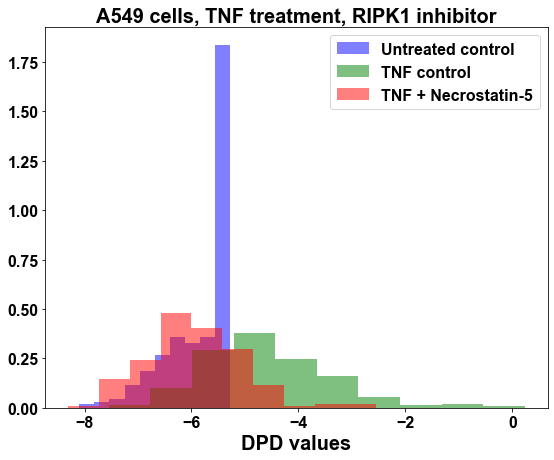

In [51]:
DPDs_epi = []
for code in A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],A549_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TNF control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TNF control',alpha=0.5)
plt.hist(DPDs_drg, bins=10,density=True,color='red',label='TNF + ' + drug_plot,alpha=0.5) 

plt.title('A549 cells, TNF treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

In [52]:
# now using pseudobulk STV to calculate DPD distribution
norm_vec_df_bulk = pd.read_csv('EMT_pseudobulk_STV_scRNAseq.csv',index_col=0)
b_coeff_df_bulk = pd.read_csv('EMT_pseudobulk_b_coef_scRNAseq.csv',index_col=0)

DPD for epithelial state = 4.041403542230283e-15 ± 0.07648765081231813
DPD for TGFb control = 4.360994408226646 ± 0.17555379907803872
DPD for RIPK1 inhibitor = 2.3519339298482573 ± 0.13869029143334113


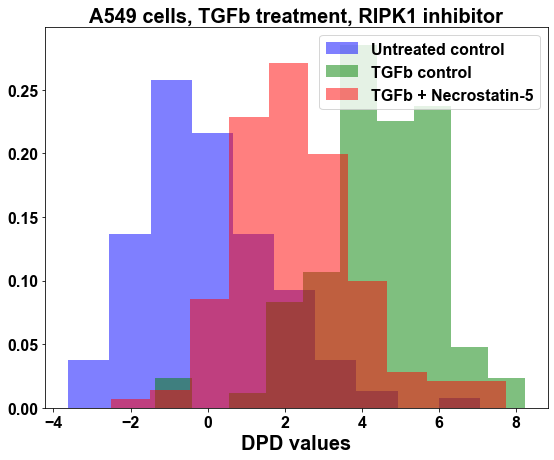

In [53]:
DPDs_epi = []

A549_TGF_scRNAseq_norm_bulk = A549_TGF_scRNAseq_norm.loc[norm_vec_df_bulk.index].copy()

for code in A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-( - np.dot(norm_vec_df_bulk['norm_vec'],A549_TGF_scRNAseq_norm_bulk[code]))/np.dot(norm_vec_df_bulk['norm_vec'],norm_vec_df_bulk['s_vec']))

DPDs_mes = []
for code in A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index:
    DPDs_mes.append(-( - np.dot(norm_vec_df_bulk['norm_vec'],A549_TGF_scRNAseq_norm_bulk[code]))/np.dot(norm_vec_df_bulk['norm_vec'],norm_vec_df_bulk['s_vec']))

DPDs_drg = []
for code in A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-( - np.dot(norm_vec_df_bulk['norm_vec'],A549_TGF_scRNAseq_norm_bulk[code]))/np.dot(norm_vec_df_bulk['norm_vec'],norm_vec_df_bulk['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TGFb control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TGFb control',alpha=0.5)
plt.hist(DPDs_drg, bins=10,density=True,color='red',label='TGFb + ' + drug_plot,alpha=0.5) 

plt.title('A549 cells, TGFb treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

In [15]:
# now we need to calculate DPDs
dr_legend['DPD_A549_TGFB']=np.nan
dr_legend['DPD_A549_EGF']=np.nan
dr_legend['DPD_A549_TNF']=np.nan

for drug in list(set(A549_TGF_metadata['Drug'])):
    print("Processing data for A549 cells, TGFB, " + drug)
    genes_values = pd.DataFrame(np.zeros(len(A549_TGF_scRNAseq_norm.index)),columns=['expression'],index=A549_TGF_scRNAseq_norm.index)
    for gene in A549_TGF_scRNAseq_norm.index:
        genes_values.at[gene,'expression'] = statistics.mean(A549_TGF_scRNAseq_norm[A549_TGF_metadata.loc[A549_TGF_metadata['Drug'] == drug].index].loc[gene])
    dr_legend.at[drug,'DPD_A549_TGFB'] = -(b_coeff - np.dot(norm_vec_df['norm_vec'],genes_values['expression']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])

for drug in list(set(A549_EGF_metadata['Drug'])):
    print("Processing data for A549 cells, EGF, " + drug)
    genes_values = pd.DataFrame(np.zeros(len(A549_EGF_scRNAseq_norm.index)),columns=['expression'],index=A549_EGF_scRNAseq_norm.index)
    for gene in A549_EGF_scRNAseq_norm.index:
        genes_values.at[gene,'expression'] = statistics.mean(A549_EGF_scRNAseq_norm[A549_EGF_metadata.loc[A549_EGF_metadata['Drug'] == drug].index].loc[gene])
    dr_legend.at[drug,'DPD_A549_EGF'] = -(b_coeff - np.dot(norm_vec_df['norm_vec'],genes_values['expression']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])

for drug in list(set(A549_TNF_metadata['Drug'])):
    print("Processing data for A549 cells, TNF, " + drug)
    genes_values = pd.DataFrame(np.zeros(len(A549_TNF_scRNAseq_norm.index)),columns=['expression'],index=A549_TNF_scRNAseq_norm.index)
    for gene in A549_TNF_scRNAseq_norm.index:
        genes_values.at[gene,'expression'] = statistics.mean(A549_TNF_scRNAseq_norm[A549_TNF_metadata.loc[A549_TNF_metadata['Drug'] == drug].index].loc[gene])
    dr_legend.at[drug,'DPD_A549_TNF'] = -(b_coeff - np.dot(norm_vec_df['norm_vec'],genes_values['expression']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])

dr_legend.to_csv('A549_EMT_scDPD_vals.csv')
dr_legend

Processing data for A549 cells, TGFB, AG-370
Processing data for A549 cells, TGFB, Ruxolitinib
Processing data for A549 cells, TGFB, Erlotinib
Processing data for A549 cells, TGFB, Gefitinib
Processing data for A549 cells, TGFB, CAY10657
Processing data for A549 cells, TGFB, Torin 1
Processing data for A549 cells, TGFB, Necrostatin-5
Processing data for A549 cells, TGFB, Valproic Acid
Processing data for A549 cells, TGFB, LY364947
Processing data for A549 cells, TGFB, PD 0325901


KeyboardInterrupt: 

In [75]:
code = 'AACAACCCAATTTCCT'
A549_EGF_scRNAseq_norm[code]

MRPL43     -0.745670
FAM171A1   -0.060051
FIZ1       -0.077465
TMEM52     -0.008678
SLCO3A1     0.480057
              ...   
SPAG7      -0.412026
ZNF724     -0.007911
ZNF576     -0.211441
AP5Z1      -0.043703
ACBD4      -0.033423
Name: AACAACCCAATTTCCT, Length: 12926, dtype: float64

In [18]:
KEA_df = pd.read_excel('kinase_screen_signatures.xlsx',index_col=0)
KEA_df

,Target,transcr_targets
Drug,,
LY364947,TGFBR1,"CDH1,TGFB1I1,PPP1CA,WWP2,EGR1,STAT1,OTUB1,SP1,..."
Erlotinib,EGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
Gefitinib,EGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
BIBF 1120,VGFR/PDGFR/FGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
PD 0325901,MEK/ERK,"NFIC,JAK1,GSK3B,STUB1,JUND,TUBB,TGFB1I1,NFATC1..."
NVP-BEZ235,PI3K/mTOR,"FOXO3,RARA,GADD45A,KDM5A,RPS3,PPP2R1A,EGR1,GSK..."
Torin 1,PI3K/mTOR,"FOXO3,RARA,GADD45A,KDM5A,RPS3,PPP2R1A,EGR1,GSK..."
PKC 412,PKC,"ELF3,HNRNPD,AURKA,PA2G4,RB1,GADD45A,KDM1A,FBXW..."
Doramapimod,p38,"SVIL,AURKA,STAG1,GSK3B,YY1,USP37,JUND,FOXM1,TU..."


In [51]:
# just trying to see some activity descriptor
drug_test = 'SP 600125'

genes = KEA_df.loc[drug_test,'transcr_targets'].split(',')
R_vals = pd.DataFrame(np.zeros((len(genes),1*3+1)),columns=['A549_TGFB','A549_EGF','A549_TNF','signs'],index=genes)

for gene in R_vals.index:
    signs = []
    
    x0=A549_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
    if drug_test in A549_TGF_RNAseq_norm.columns:
        x1=A549_TGF_RNAseq_norm.loc[gene,drug_test]
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_vals.at[gene,'A549_TGFB'] = R_global
        if R_global >= 0:
            signs.append(1)
        else:
            signs.append(-1)
    else:
        R_vals.at[gene,'A549_TGFB'] = np.nan
        signs.append(np.nan)
    x0=A549_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
    if drug_test in A549_EGF_RNAseq_norm.columns:
        x1=A549_EGF_RNAseq_norm.loc[gene,drug_test]
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_vals.at[gene,'A549_EGF'] = R_global
        if R_global >= 0:
            signs.append(1)
        else:
            signs.append(-1)
    else:
        R_vals.at[gene,'A549_EGF'] = np.nan
        signs.append(np.nan)
    x0=A549_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
    if drug_test in A549_TNF_RNAseq_norm.columns:
        x1=A549_TNF_RNAseq_norm.loc[gene,drug_test]
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_vals.at[gene,'A549_TNF'] = R_global
        if R_global >= 0:
            signs.append(1)
        else:
            signs.append(-1)
    else:
        R_vals.at[gene,'A549_TNF'] = np.nan
        signs.append(np.nan)
    
    R_vals.at[gene,'signs'] = np.nanmean(signs)
    
#R_vals = R_vals.fillna(0)
R_vals_filter = R_vals.loc[np.abs(R_vals['signs']) >= 0.95].copy()
# the required signature is in R_vals_filter['signs']

R_vals_filter

,A549_TGFB,A549_EGF,A549_TNF,signs
RARA,-1.443033,-0.849777,-1.087042,-1.0
SIRT6,-1.486294,-0.980138,-0.089978,-1.0
JUND,-0.386564,-0.265628,-1.225666,-1.0
STAT1,-0.294162,-0.060216,-0.948619,-1.0
SP1,-0.798068,-0.135638,-1.946988,-1.0
JUNB,0.141323,0.118580,0.663854,1.0
CDKN1A,0.586354,0.920914,1.435747,1.0
HMGA1,-0.383116,-1.276540,-1.270495,-1.0
IER3,-0.456972,-0.492434,-0.489336,-1.0
SUZ12,-1.341776,-1.181791,-0.699843,-1.0


In [52]:
Rs = []
for cond in R_vals_filter.columns[:-1]:
    gene_sign_R = []
    for gene_name_sign in R_vals_filter.index:
        if R_vals_filter.loc[gene_name_sign,'signs'] < 0:
            gene_sign_R.append(R_vals_filter.loc[gene_name_sign,cond])
        else:
            gene_sign_R.append(-R_vals_filter.loc[gene_name_sign,cond])
    #print(gene_sign_R)
    Rs.append(np.nanmean(gene_sign_R))

Rs_df = pd.DataFrame(Rs,columns=['R_values'],index=list(R_vals_filter.columns[:-1]))
Rs_df


,R_values
A549_TGFB,-0.669661
A549_EGF,-0.817540
A549_TNF,-0.909058


In [61]:
# preparing modules and perturbation lists
perturbations = list(KEA_df.index)
modules = []
for pert in perturbations:
    if len(modules) > 0:
        if KEA_df.loc[pert,'Target'] != modules[-1]:
            modules.append(KEA_df.loc[pert,'Target'])
    else: 
        modules.append(KEA_df.loc[pert,'Target'])
modules.append('DPD')
print("Our modules are: " + ", ".join(modules) + ". " + str(len(modules)) + " in total.")
print('\n')
print("Applied perturbations are: " + ", ".join(perturbations) + ". " + str(len(perturbations)) + " in total.")


Our modules are: TGFBR1, EGFR, VGFR/PDGFR/FGFR, MEK/ERK, PI3K/mTOR, PKC, p38, JNK, Aurora-A, RIPK1, IKK2, JAK, GSK3B, DPD. 14 in total.


Applied perturbations are: LY364947, Erlotinib, Gefitinib, BIBF 1120, PD 0325901, NVP-BEZ235, Torin 1, PKC 412, Doramapimod, SP 600125, Phthalazinone Pyrazole, Necrostatin-5, CAY10657, Ruxolitinib, CHIR99021. 15 in total.


In [69]:
# filling R matrices for A549 cells
R_A549_TGF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)
R_A549_EGF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)
R_A549_TNF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)

# filling signalling part
for module in modules[:-1]:
    # obtaining activity descriptor
    drug = KEA_df.loc[KEA_df['Target'] == module].index[0]
    genes = KEA_df.loc[drug,'transcr_targets'].split(',')
    R_vals = pd.DataFrame(np.zeros((len(genes),1*3+1)),columns=['A549_TGFB','A549_EGF','A549_TNF','signs'],index=genes)
    for gene in R_vals.index:
        signs = []
        x0=A549_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
        if drug in A549_TGF_RNAseq_norm.columns:
            x1=A549_TGF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'A549_TGFB'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'A549_TGFB'] = np.nan
            signs.append(np.nan)
        x0=A549_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
        if drug in A549_EGF_RNAseq_norm.columns:
            x1=A549_EGF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'A549_EGF'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'A549_EGF'] = np.nan
            signs.append(np.nan)
        x0=A549_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
        if drug in A549_TNF_RNAseq_norm.columns:
            x1=A549_TNF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'A549_TNF'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'A549_TNF'] = np.nan
            signs.append(np.nan)
        R_vals.at[gene,'signs'] = np.nanmean(signs)
    R_vals_filter = R_vals.loc[np.abs(R_vals['signs']) >= 0.9].copy()
    # now R_vals_filter has activity descriptor for the module
    # calculating R for the specific module
    for pert in perturbations:
        # TGFb
        if pert in A549_TGF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_TGF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=A549_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
                x1=A549_TGF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_TGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_A549_TGF.at[module,pert] = np.nanmean(Rs_TGF)
        else:
            R_A549_TGF.at[module,pert] = np.nan
        # EGF
        if pert in A549_EGF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_EGF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=A549_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
                x1=A549_EGF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_EGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_A549_EGF.at[module,pert] = np.nanmean(Rs_EGF)
        else:
            R_A549_EGF.at[module,pert] = np.nan
        # TNF
        if pert in A549_TNF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_TNF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=A549_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
                x1=A549_TNF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_TNF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_A549_TNF.at[module,pert] = np.nanmean(Rs_TNF)
        else:
            R_A549_TNF.at[module,pert] = np.nan

# fillfing DPD
for pert in perturbations:
    # TGFb
    x0 = dr_legend.loc['Uninhibited_TGFB1','DPD_A549_TGFB']
    x1 = dr_legend.loc[pert,'DPD_A549_TGFB']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_A549_TGF.at['DPD',pert] = R_global
    # EGF
    x0 = dr_legend.loc['Uninhibited_EGF','DPD_A549_EGF']
    x1 = dr_legend.loc[pert,'DPD_A549_EGF']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_A549_EGF.at['DPD',pert] = R_global
    # TNF
    x0 = dr_legend.loc['Uninhibited_TNF','DPD_A549_TNF']
    x1 = dr_legend.loc[pert,'DPD_A549_TNF']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_A549_TNF.at['DPD',pert] = R_global

R_A549_TGF.to_csv('R_A549_TGFb.csv')
R_A549_EGF.to_csv('R_A549_EGF.csv')
R_A549_TNF.to_csv('R_A549_TNF.csv')
R_A549_TGF

,LY364947,Erlotinib,Gefitinib,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
TGFBR1,-1.020737,0.466051,0.287986,-0.258974,-0.219259,NaN,0.488222,0.091827,0.491142,0.255748,-0.006171,-0.204516,-0.052864,0.697647,-0.596235
EGFR,-0.054466,-0.749761,-0.211435,-0.249687,0.579415,NaN,-0.245282,-0.008050,0.271919,0.015128,0.292851,-0.198880,-0.368895,0.161153,0.134552
VGFR/PDGFR/FGFR,-0.447136,-0.619414,-0.175311,-0.762164,0.276242,NaN,-0.056016,-0.180095,0.020951,0.216691,0.078540,-0.483148,-0.060964,0.044447,-0.179928
MEK/ERK,-0.249697,-0.233490,-0.181988,-0.132045,-0.898967,NaN,-0.229211,-0.403399,-0.158017,0.001458,-0.189687,0.003820,-0.291042,-0.084130,-0.218012
PI3K/mTOR,-0.140869,-0.123272,-0.088572,-0.210870,-0.506317,NaN,-0.209502,-0.299981,-0.352178,-0.163627,-0.232287,-0.041428,-0.395946,-0.075296,-0.006936
PKC,-0.145834,-0.326609,-0.390956,-0.179583,-0.309580,NaN,-0.418783,-0.911677,-0.213685,-0.123426,-0.096300,-0.049858,-0.577312,-0.068711,-0.220701
p38,-0.149146,-0.098076,-0.127821,-0.115741,-0.337479,NaN,-0.413541,-0.320955,-0.673167,-0.362718,-0.331182,-0.015414,-0.133734,-0.303820,-0.257907
JNK,-0.092286,-0.332074,-0.181950,0.140464,-0.320936,NaN,-0.091057,-0.382765,-0.015193,-0.669661,-0.019945,-0.319722,-0.210934,-0.204219,-0.444871
Aurora-A,-0.367767,0.016181,-0.206370,-0.293411,-0.018394,NaN,-0.492309,0.107619,-0.186930,0.026654,-1.076155,-0.478785,-0.701985,-0.222569,-0.727816
RIPK1,-0.454048,-0.146929,-0.158177,-0.552928,-0.375811,NaN,-0.197185,-0.181320,-0.180381,-0.143791,-0.150805,-0.721417,0.219868,-0.630895,0.061879


In [70]:
# filling R matrices for DU145 cells
R_DU145_TGF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)
R_DU145_EGF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)
R_DU145_TNF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)

# filling signalling part
for module in modules[:-1]:
    # obtaining activity descriptor
    drug = KEA_df.loc[KEA_df['Target'] == module].index[0]
    genes = KEA_df.loc[drug,'transcr_targets'].split(',')
    R_vals = pd.DataFrame(np.zeros((len(genes),1*3+1)),columns=['DU145_TGFB','DU145_EGF','DU145_TNF','signs'],index=genes)
    for gene in R_vals.index:
        signs = []
        x0=DU145_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
        if drug in DU145_TGF_RNAseq_norm.columns:
            x1=DU145_TGF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'DU145_TGFB'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'DU145_TGFB'] = np.nan
            signs.append(np.nan)
        x0=DU145_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
        if drug in DU145_EGF_RNAseq_norm.columns:
            x1=DU145_EGF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'DU145_EGF'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'DU145_EGF'] = np.nan
            signs.append(np.nan)
        x0=DU145_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
        if drug in DU145_TNF_RNAseq_norm.columns:
            x1=DU145_TNF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'DU145_TNF'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'DU145_TNF'] = np.nan
            signs.append(np.nan)
        R_vals.at[gene,'signs'] = np.nanmean(signs)
    R_vals_filter = R_vals.loc[np.abs(R_vals['signs']) >= 0.9].copy()
    # now R_vals_filter has activity descriptor for the module
    # calculating R for the specific module
    for pert in perturbations:
        # TGFb
        if pert in DU145_TGF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_TGF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=DU145_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
                x1=DU145_TGF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_TGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_DU145_TGF.at[module,pert] = np.nanmean(Rs_TGF)
        else:
            R_DU145_TGF.at[module,pert] = np.nan
        # EGF
        if pert in DU145_EGF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_EGF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=DU145_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
                x1=DU145_EGF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_EGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_DU145_EGF.at[module,pert] = np.nanmean(Rs_EGF)
        else:
            R_DU145_EGF.at[module,pert] = np.nan
        # TNF
        if pert in DU145_TNF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_TNF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=DU145_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
                x1=DU145_TNF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_TNF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_DU145_TNF.at[module,pert] = np.nanmean(Rs_TNF)
        else:
            R_DU145_TNF.at[module,pert] = np.nan

# fillfing DPD
for pert in perturbations:
    # TGFb
    x0 = dr_legend.loc['Uninhibited_TGFB1','DPD_DU145_TGFB']
    x1 = dr_legend.loc[pert,'DPD_DU145_TGFB']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_DU145_TGF.at['DPD',pert] = R_global
    # EGF
    x0 = dr_legend.loc['Uninhibited_EGF','DPD_DU145_EGF']
    x1 = dr_legend.loc[pert,'DPD_DU145_EGF']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_DU145_EGF.at['DPD',pert] = R_global
    # TNF
    x0 = dr_legend.loc['Uninhibited_TNF','DPD_DU145_TNF']
    x1 = dr_legend.loc[pert,'DPD_DU145_TNF']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_DU145_TNF.at['DPD',pert] = R_global

R_DU145_TGF.to_csv('R_DU145_TGFb.csv')
R_DU145_EGF.to_csv('R_DU145_EGF.csv')
R_DU145_TNF.to_csv('R_DU145_TNF.csv')
R_DU145_TGF

,LY364947,Erlotinib,Gefitinib,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
TGFBR1,-0.551136,-0.399562,-0.240938,-0.638840,-0.366023,-0.358863,-0.430080,-0.307023,-0.716641,-0.650227,-0.209794,-1.054178,-0.200392,-0.891123,0.056028
EGFR,-0.209227,-0.616687,-0.768471,-0.661435,-0.805691,-0.018553,-0.339140,-0.562675,0.111864,-0.416166,-0.412971,-0.195899,-0.616855,-0.126957,-0.254691
VGFR/PDGFR/FGFR,-0.246888,-0.573401,-0.497676,-0.860166,-0.423870,0.027596,-0.025381,-0.417472,-0.180915,-0.483112,-0.437790,-0.315293,-0.491884,0.330251,-0.523766
MEK/ERK,0.102913,-0.416535,-0.499723,-0.223317,-0.936371,-0.268240,-0.304268,-0.231828,0.028663,0.037126,0.203054,0.127702,-0.347491,-0.103910,-0.077487
PI3K/mTOR,-0.070603,-0.436696,-0.351568,-0.365017,-0.205571,-0.880369,-0.706614,-0.594543,-0.103101,-0.038779,0.146335,-0.163745,-0.528073,-0.254779,0.094361
PKC,0.028229,-0.522250,-0.488087,-0.275608,-0.429178,-0.420197,-0.379056,-0.952142,0.226234,0.031509,0.212230,0.057096,-0.290394,-0.009125,-0.127049
p38,-0.128411,0.080281,-0.014889,0.173688,0.296237,0.019024,-0.033500,0.202423,-0.719894,-0.166725,-0.182130,-0.291589,-0.030809,-0.155657,-0.086905
JNK,-0.586549,-0.134518,-0.064893,-0.208059,-0.057540,-0.043034,-0.177317,-0.281822,-0.440413,-0.729788,0.130332,-0.747625,-0.325495,-0.180443,0.268675
Aurora-A,-0.623260,-0.069195,0.069414,-0.358514,-0.202547,-0.089920,0.416283,0.227787,-0.805268,-0.601359,-0.696880,-0.976538,-0.722181,0.075791,-0.511353
RIPK1,-1.705235,-1.348866,-1.901077,0.470332,-0.245416,0.838732,-1.643087,0.500613,-1.196339,-1.968126,-0.641375,-0.102440,-1.213349,-1.501046,0.660515


In [71]:
# filling R matrices for MCF7 cells
R_MCF7_TGF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)
R_MCF7_EGF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)
R_MCF7_TNF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)

# filling signalling part
for module in modules[:-1]:
    # obtaining activity descriptor
    drug = KEA_df.loc[KEA_df['Target'] == module].index[0]
    genes = KEA_df.loc[drug,'transcr_targets'].split(',')
    R_vals = pd.DataFrame(np.zeros((len(genes),1*3+1)),columns=['MCF7_TGFB','MCF7_EGF','MCF7_TNF','signs'],index=genes)
    for gene in R_vals.index:
        signs = []
        x0=MCF7_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
        if drug in MCF7_TGF_RNAseq_norm.columns:
            x1=MCF7_TGF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'MCF7_TGFB'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'MCF7_TGFB'] = np.nan
            signs.append(np.nan)
        x0=MCF7_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
        if drug in MCF7_EGF_RNAseq_norm.columns:
            x1=MCF7_EGF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'MCF7_EGF'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'MCF7_EGF'] = np.nan
            signs.append(np.nan)
        x0=MCF7_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
        if drug in MCF7_TNF_RNAseq_norm.columns:
            x1=MCF7_TNF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'MCF7_TNF'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'MCF7_TNF'] = np.nan
            signs.append(np.nan)
        R_vals.at[gene,'signs'] = np.nanmean(signs)
    R_vals_filter = R_vals.loc[np.abs(R_vals['signs']) >= 0.9].copy()
    # now R_vals_filter has activity descriptor for the module
    # calculating R for the specific module
    for pert in perturbations:
        # TGFb
        if pert in MCF7_TGF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_TGF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=MCF7_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
                x1=MCF7_TGF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_TGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_MCF7_TGF.at[module,pert] = np.nanmean(Rs_TGF)
        else:
            R_MCF7_TGF.at[module,pert] = np.nan
        # EGF
        if pert in MCF7_EGF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_EGF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=MCF7_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
                x1=MCF7_EGF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_EGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_MCF7_EGF.at[module,pert] = np.nanmean(Rs_EGF)
        else:
            R_MCF7_EGF.at[module,pert] = np.nan
        # TNF
        if pert in MCF7_TNF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_TNF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=MCF7_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
                x1=MCF7_TNF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_TNF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_MCF7_TNF.at[module,pert] = np.nanmean(Rs_TNF)
        else:
            R_MCF7_TNF.at[module,pert] = np.nan

# fillfing DPD
for pert in perturbations:
    # TGFb
    x0 = dr_legend.loc['Uninhibited_TGFB1','DPD_MCF7_TGFB']
    x1 = dr_legend.loc[pert,'DPD_MCF7_TGFB']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_MCF7_TGF.at['DPD',pert] = R_global
    # EGF
    x0 = dr_legend.loc['Uninhibited_EGF','DPD_MCF7_EGF']
    x1 = dr_legend.loc[pert,'DPD_MCF7_EGF']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_MCF7_EGF.at['DPD',pert] = R_global
    # TNF
    x0 = dr_legend.loc['Uninhibited_TNF','DPD_MCF7_TNF']
    x1 = dr_legend.loc[pert,'DPD_MCF7_TNF']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_MCF7_TNF.at['DPD',pert] = R_global

R_MCF7_TGF.to_csv('R_MCF7_TGFb.csv')
R_MCF7_EGF.to_csv('R_MCF7_EGF.csv')
R_MCF7_TNF.to_csv('R_MCF7_TNF.csv')
R_MCF7_TGF

,LY364947,Erlotinib,Gefitinib,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
TGFBR1,-1.055053,-0.064680,-0.190009,0.128943,-0.665073,NaN,NaN,-0.687803,-0.381374,-0.286298,NaN,-0.649151,NaN,-0.041235,-0.520333
EGFR,-0.259792,-0.955945,-0.768394,-0.288412,-0.463975,NaN,NaN,-0.091516,-0.145425,-0.601237,NaN,-0.253242,NaN,-0.419333,-0.042150
VGFR/PDGFR/FGFR,-1.067604,-0.474651,0.007472,-0.982966,-1.013211,NaN,NaN,-0.037703,-0.944995,-0.654785,NaN,-0.720701,NaN,-0.151610,-0.152525
MEK/ERK,-0.693151,-0.110204,-0.265927,-0.175359,-1.014844,NaN,NaN,-0.314762,-0.220969,-0.197615,NaN,-0.529422,NaN,-0.151915,-0.303757
PI3K/mTOR,0.215125,0.071053,-0.038773,-0.241994,-0.073272,NaN,NaN,0.014559,-0.201383,0.014659,NaN,0.077967,NaN,0.028847,-0.097201
PKC,-0.016468,-0.200934,-0.128169,-0.141875,0.043585,NaN,NaN,-0.880522,-0.213675,-0.085557,NaN,-0.069869,NaN,-0.238499,-0.514791
p38,-0.426225,-0.087266,-0.172355,-0.122894,-0.272524,NaN,NaN,-0.229166,-0.755959,-0.222639,NaN,-0.137103,NaN,0.051115,-0.210528
JNK,-0.595237,-0.005300,-0.267174,0.105658,-0.084393,NaN,NaN,0.154475,0.158441,-0.652947,NaN,0.505260,NaN,-0.097692,-0.404981
Aurora-A,0.052516,0.063555,-0.299456,0.261328,0.177435,NaN,NaN,-0.249510,-0.088222,-0.097943,NaN,0.147783,NaN,0.197907,-0.138950
RIPK1,-1.038008,-0.062500,0.291154,-0.778548,-0.872320,NaN,NaN,-0.070282,0.249155,-0.201404,NaN,-0.783397,NaN,-0.247774,-0.045074


In [74]:
# filling R matrices for OVCA420 cells
R_OVCA420_TGF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)
R_OVCA420_EGF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)
R_OVCA420_TNF = pd.DataFrame(np.zeros((len(modules),len(perturbations))),index=modules,columns=perturbations)

# filling signalling part
for module in modules[:-1]:
    # obtaining activity descriptor
    drug = KEA_df.loc[KEA_df['Target'] == module].index[0]
    genes = KEA_df.loc[drug,'transcr_targets'].split(',')
    R_vals = pd.DataFrame(np.zeros((len(genes),1*3+1)),columns=['OVCA420_TGFB','OVCA420_EGF','OVCA420_TNF','signs'],index=genes)
    for gene in R_vals.index:
        signs = []
        x0=OVCA420_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
        if drug in OVCA420_TGF_RNAseq_norm.columns:
            x1=OVCA420_TGF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'OVCA420_TGFB'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'OVCA420_TGFB'] = np.nan
            signs.append(np.nan)
        x0=OVCA420_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
        if drug in OVCA420_EGF_RNAseq_norm.columns:
            x1=OVCA420_EGF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'OVCA420_EGF'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'OVCA420_EGF'] = np.nan
            signs.append(np.nan)
        x0=OVCA420_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
        if drug in OVCA420_TNF_RNAseq_norm.columns:
            x1=OVCA420_TNF_RNAseq_norm.loc[gene,drug]
            R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
            R_vals.at[gene,'OVCA420_TNF'] = R_global
            if R_global >= 0:
                signs.append(1)
            else:
                signs.append(-1)
        else:
            R_vals.at[gene,'OVCA420_TNF'] = np.nan
            signs.append(np.nan)
        R_vals.at[gene,'signs'] = np.nanmean(signs)
    R_vals_filter = R_vals.loc[np.abs(R_vals['signs']) >= 0.9].copy()
    # now R_vals_filter has activity descriptor for the module
    # calculating R for the specific module
    for pert in perturbations:
        # TGFb
        if pert in OVCA420_TGF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_TGF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=OVCA420_TGF_RNAseq_norm.loc[gene,'Uninhibited_TGFB1']
                x1=OVCA420_TGF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_TGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_OVCA420_TGF.at[module,pert] = np.nanmean(Rs_TGF)
        else:
            R_OVCA420_TGF.at[module,pert] = np.nan
        # EGF
        if pert in OVCA420_EGF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_EGF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=OVCA420_EGF_RNAseq_norm.loc[gene,'Uninhibited_EGF']
                x1=OVCA420_EGF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_EGF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_OVCA420_EGF.at[module,pert] = np.nanmean(Rs_EGF)
        else:
            R_OVCA420_EGF.at[module,pert] = np.nan
        # TNF
        if pert in OVCA420_TNF_RNAseq_norm.columns:
            # here we must run through all the genes in the signature and fill R arrays, taking into account signs
            Rs_TNF = []
            for gene in R_vals_filter.index:
                # filling R values once again, now taking into account signs
                x0=OVCA420_TNF_RNAseq_norm.loc[gene,'Uninhibited_TNF']
                x1=OVCA420_TNF_RNAseq_norm.loc[gene,pert]
                R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
                Rs_TNF.append(R_global*R_vals_filter.loc[gene,'signs']*(-1))
            R_OVCA420_TNF.at[module,pert] = np.nanmean(Rs_TNF)
        else:
            R_OVCA420_TNF.at[module,pert] = np.nan

# fillfing DPD
for pert in perturbations:
    # TGFb
    x0 = dr_legend.loc['Uninhibited_TGFB1','DPD_OVCA420_TGFB']
    x1 = dr_legend.loc[pert,'DPD_OVCA420_TGFB']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_OVCA420_TGF.at['DPD',pert] = R_global
    # EGF
    x0 = dr_legend.loc['Uninhibited_EGF','DPD_OVCA420_EGF']
    x1 = dr_legend.loc[pert,'DPD_OVCA420_EGF']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_OVCA420_EGF.at['DPD',pert] = R_global
    # TNF
    x0 = dr_legend.loc['Uninhibited_TNF','DPD_OVCA420_TNF']
    x1 = dr_legend.loc[pert,'DPD_OVCA420_TNF']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_OVCA420_TNF.at['DPD',pert] = R_global

R_OVCA420_TGF.to_csv('R_OVCA420_TGFb.csv')
R_OVCA420_EGF.to_csv('R_OVCA420_EGF.csv')
R_OVCA420_TNF.to_csv('R_OVCA420_TNF.csv')
R_OVCA420_TGF

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3.6/site-packages/ipykernel_launc

,LY364947,Erlotinib,Gefitinib,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
TGFBR1,-0.740590,-0.405569,-0.081307,-0.600478,-0.222727,-0.525989,-0.512400,-0.800215,-0.466434,-0.448512,-0.439723,-0.551234,-0.649668,-0.514223,-0.500700
EGFR,-0.094880,-0.851422,-0.522398,-0.094530,-0.237593,-0.149697,-0.282601,-0.349191,-0.268052,-0.143961,-0.055304,-0.075135,-0.186988,0.100308,-0.159829
VGFR/PDGFR/FGFR,-0.259711,-0.330949,-0.140880,-0.187643,0.029342,0.016122,0.053738,-0.787680,-0.126360,0.091614,-0.127631,0.077871,0.214796,-0.007545,-0.117249
MEK/ERK,-0.133888,-0.454013,-0.210076,-0.177298,-0.712193,-0.160307,-0.070401,-0.270216,-0.093053,-0.044768,-0.178534,-0.113531,-0.185065,0.053613,-0.070963
PI3K/mTOR,0.353985,-0.214222,-0.246294,-0.126220,-0.051817,-0.758121,-0.289822,-0.257540,0.178004,-0.071610,0.050190,0.130135,-0.128043,-0.121015,0.270100
PKC,-0.279094,-0.256973,-0.202852,-0.178467,-0.116913,-0.247673,-0.250573,-0.875407,-0.237918,-0.411680,-0.244518,-0.248694,-0.248028,-0.237584,-0.282156
p38,-0.616567,-0.458915,-0.216793,-0.282254,-0.446466,-0.294586,-0.216420,-0.310601,-0.632853,-0.400635,-0.518682,-0.547002,-0.187477,-0.185835,-0.581586
JNK,-0.665134,-0.646849,-0.304412,-0.389067,-0.851541,-0.142844,-0.306130,-0.297498,-0.293250,-0.731293,-0.683613,-0.692449,-0.620317,-0.294386,-0.461429
Aurora-A,-0.929312,-1.716087,0.503183,-0.667934,-1.716087,-1.066744,-1.255190,-0.430511,-1.462193,-1.716087,-1.608389,-0.976812,-1.010637,-1.293866,-1.526043
RIPK1,-0.640283,-1.523560,-0.639050,-0.631391,-0.464426,-1.091050,-0.872814,-0.352050,-0.667122,-0.743646,-0.734134,-0.910925,-1.078551,-1.058407,-0.399591
